In [12]:
pip install dash

  Obtaining dependency information for dash from https://files.pythonhosted.org/packages/b2/10/388c4a697275417a6974033e6ea7235d61e648e6c39d9cc06fcc6a6f71d4/dash-2.15.0-py3-none-any.whl.metadata
  Obtaining dependency information for dash-html-components==2.0.0 from https://files.pythonhosted.org/packages/75/65/1b16b853844ef59b2742a7de74a598f376ac0ab581f0dcc34db294e5c90e/dash_html_components-2.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for dash-core-components==2.0.0 from https://files.pythonhosted.org/packages/00/9e/a29f726e84e531a36d56cff187e61d8c96d2cc253c5bcef9a7695acb7e6a/dash_core_components-2.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for dash-table==5.0.0 from https://files.pythonhosted.org/packages/da/ce/43f77dc8e7bbad02a9f88d07bf794eaf68359df756a28bb9f2f78e255bb1/dash_table-5.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for retrying from https://files.pythonhosted.org/packages/8f/04/9e36f28be4c0532c0e9207ff9dc01fb

In [1]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import pandas as pd
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from konlpy.tag import Okt
import nltk
import koreanize_matplotlib

okt = Okt()
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
df = pd.read_csv('csv/test.csv')

In [4]:
import re

def remove_special_characters(text):
    # 이모티콘 및 특수문자 제거를 위한 정규표현식
    pattern = r'[^a-zA-Z0-9가-힣\s]'  # 영문, 한글, 숫자, 공백만 허용

    # 정규표현식을 사용하여 특수문자 제거
    cleaned_text = re.sub(pattern, '', text)
    return cleaned_text

# '내용' 열의 각 행에 대해 이모티콘과 특수문자 제거
df['contents'] = df['내용'].dropna().apply(remove_special_characters)

In [5]:
df[['내용','contents']]

,내용,contents
0,2024년 취업가능! 항공 데이터 전문가 양성과정\n💻7기 선착순 모집중\n\n_2...,2024년 취업가능 항공 데이터 전문가 양성과정\n7기 선착순 모집중\n\n24년 ...
1,"2024년 ""日本, JAVA 및 ICT 전문가 양성과정(7기)"" 연수생을 모집합니다...",2024년 JAVA 및 ICT 전문가 양성과정7기 연수생을 모집합니다\n\n한국산...
2,"2024년 백엔드 취업까지 걸리는 시간\n단, 6개월\n\n테킷 백엔드 스쿨은\nJ...",2024년 백엔드 취업까지 걸리는 시간\n단 6개월\n\n테킷 백엔드 스쿨은\nJa...
3,📢 Java 기반 DevOps 개발자 양성과정 훈련생 모집\n\n#개발 과 #운영 ...,Java 기반 DevOps 개발자 양성과정 훈련생 모집\n\n개발 과 운영 을 동...
4,"👨‍💻 IT 개발자 필수 채용정보. ZIP\n\n👉print(“Hello, IT개발...",IT 개발자 필수 채용정보 ZIP\n\nprintHello IT개발자\n개발자 취...
...,...,...
415,🚨 백엔드 부트캠프 시작 전 체크리스트 🚨\n'누가' '무엇을' 알려주는지 꼭 확인...,백엔드 부트캠프 시작 전 체크리스트 \n누가 무엇을 알려주는지 꼭 확인하세요\n\...
416,🚨 백엔드 부트캠프 시작 전 체크리스트 🚨\n'누가' '무엇을' 알려주는지 꼭 확인...,백엔드 부트캠프 시작 전 체크리스트 \n누가 무엇을 알려주는지 꼭 확인하세요\n\...
417,부트캠프 선택 전 '누가' '무엇을' 알려주는지 꼭 확인하세요!\n백엔드 스쿨은 백...,부트캠프 선택 전 누가 무엇을 알려주는지 꼭 확인하세요\n백엔드 스쿨은 백준과 함께...
418,🎊 마케팅 취업교육 사전 설명회\n9월 10일 일요일 오후 8시!\n마케팅 취업교육...,마케팅 취업교육 사전 설명회\n9월 10일 일요일 오후 8시\n마케팅 취업교육 원...


## 단어 빈도수

In [44]:
def extract_nouns(text):
    if text is not None and isinstance(text, str):
        nouns = okt.nouns(text)
        return nouns
    else:
        return []
    

# '내용'열에서 명사 추출
content_nouns = [okt.nouns(str(text)) if pd.notnull(text) else [] for text in df['내용']]
content_nouns = [noun for sublist in content_nouns for noun in sublist]

# 한 글자인 명사 필터링
filtered_nouns = []
for nouns_list in content_nouns:
    filtered_nouns.extend([noun for noun in nouns_list if len(noun) > 1])

print(filtered_nouns)


# 단어 빈도수 계산
content_count = Counter(content_nouns)

# 가장 빈도가 높은 상위 10개 명사 추출 
top_content_nouns = content_count.most_common(15)

df['nouns'] = df['내용'].apply(extract_nouns)


[]


In [7]:
top_content_nouns

[('취업', 1272),
 ('데이터', 435),
 ('스쿨', 425),
 ('개발자', 310),
 ('부트캠프', 269),
 ('백엔드', 265),
 ('분석', 265),
 ('교육', 255),
 ('프로젝트', 246),
 ('지원', 228),
 ('현직', 208),
 ('준비', 204),
 ('수', 186),
 ('실무', 167),
 ('포트폴리오', 166)]

In [46]:
count = Counter(filtered_nouns)
noun_list = count.most_common(20)
noun_list2 = count.most_common(50)
# 결과 출력
for v in noun_list:
    print(v)

In [47]:
noun_list

[]

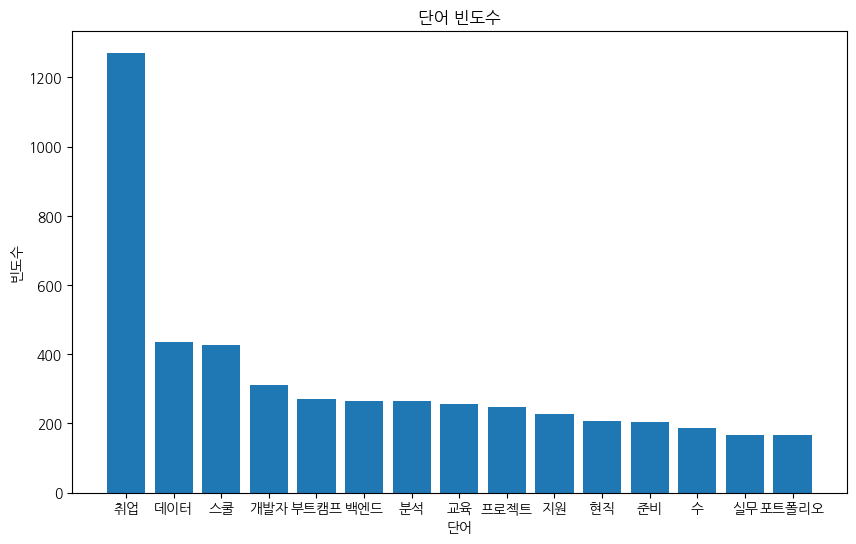

In [9]:
words, frequencies = zip(*top_content_nouns)

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(range(len(words)), frequencies, tick_label=words)
plt.title('단어 빈도수')
plt.xlabel('단어')
plt.ylabel('빈도수')
plt.show()


In [10]:
df

,검색어,라이브러리 ID,게재 날짜,제목,내용,contents,nouns
0,Java 취업,1176516517088600,2024-02-22,캠펑 - 대학생 필수 정보,2024년 취업가능! 항공 데이터 전문가 양성과정\n💻7기 선착순 모집중\n\n_2...,2024년 취업가능 항공 데이터 전문가 양성과정\n7기 선착순 모집중\n\n24년 ...,"[취업, 가능, 항공, 데이터, 전문가, 양성, 과정, 기, 선착순, 집중, 교육,..."
1,Java 취업,1098477178042840,2024-02-22,Hexagon GMI -헥사곤지엠아이,"2024년 ""日本, JAVA 및 ICT 전문가 양성과정(7기)"" 연수생을 모집합니다...",2024년 JAVA 및 ICT 전문가 양성과정7기 연수생을 모집합니다\n\n한국산...,"[및, 전문가, 양성, 과정, 기, 수생, 모집, 한국, 산업, 인력, 공단, 스쿨..."
2,Java 취업,841693737672012,2024-02-22,멋쟁이사자처럼,"2024년 백엔드 취업까지 걸리는 시간\n단, 6개월\n\n테킷 백엔드 스쿨은\nJ...",2024년 백엔드 취업까지 걸리는 시간\n단 6개월\n\n테킷 백엔드 스쿨은\nJa...,"[백엔드, 취업, 시간, 단, 개월, 테킷, 백엔드, 스쿨, 기초, 해커, 톤, 프..."
3,Java 취업,1160377278672171,2024-02-20,한국소프트웨어기술진흥협회,📢 Java 기반 DevOps 개발자 양성과정 훈련생 모집\n\n#개발 과 #운영 ...,Java 기반 DevOps 개발자 양성과정 훈련생 모집\n\n개발 과 운영 을 동...,"[기반, 개발자, 양성, 과정, 훈련, 생, 모집, 과, 동시, 교육비, 부담, 수..."
4,Java 취업,777866557735501,2024-02-19,잡코리아,"👨‍💻 IT 개발자 필수 채용정보. ZIP\n\n👉print(“Hello, IT개발...",IT 개발자 필수 채용정보 ZIP\n\nprintHello IT개발자\n개발자 취...,"[개발자, 필수, 채용정보, 개발자, 개발자, 취업, 고민, 라면, 전문, 채용, ..."
...,...,...,...,...,...,...,...
415,부트캠프,832574571640809,2023-09-28,제로베이스 백엔드 스쿨,🚨 백엔드 부트캠프 시작 전 체크리스트 🚨\n'누가' '무엇을' 알려주는지 꼭 확인...,백엔드 부트캠프 시작 전 체크리스트 \n누가 무엇을 알려주는지 꼭 확인하세요\n\...,"[백엔드, 부트캠프, 시작, 전, 체크, 리스트, 누가, 무엇, 꼭, 확인, 여러분..."
416,부트캠프,859957832186724,2023-09-27,제로베이스 백엔드 스쿨,🚨 백엔드 부트캠프 시작 전 체크리스트 🚨\n'누가' '무엇을' 알려주는지 꼭 확인...,백엔드 부트캠프 시작 전 체크리스트 \n누가 무엇을 알려주는지 꼭 확인하세요\n\...,"[백엔드, 부트캠프, 시작, 전, 체크, 리스트, 누가, 무엇, 꼭, 확인, 여러분..."
417,부트캠프,885125349675180,2023-09-27,제로베이스 백엔드 스쿨,부트캠프 선택 전 '누가' '무엇을' 알려주는지 꼭 확인하세요!\n백엔드 스쿨은 백...,부트캠프 선택 전 누가 무엇을 알려주는지 꼭 확인하세요\n백엔드 스쿨은 백준과 함께...,"[부트캠프, 선택, 전, 누가, 무엇, 꼭, 확인, 백엔드, 스쿨, 준, 여러분, ..."
418,부트캠프,661704555668741,2023-08-30,노아노마드,🎊 마케팅 취업교육 사전 설명회\n9월 10일 일요일 오후 8시!\n마케팅 취업교육...,마케팅 취업교육 사전 설명회\n9월 10일 일요일 오후 8시\n마케팅 취업교육 원...,"[마케팅, 취업, 교육, 사전, 설명, 회, 일요일, 오후, 마케팅, 취업, 교육,..."


In [13]:
import plotly.express as px
from dash import Dash, dcc, html

import pandas as pd

# 앱 초기화
app = Dash(__name__)

# 레이아웃 정의
app.layout = html.Div([
    html.H1("Top 10 Nouns Frequency"),
    dcc.Graph(
        id='bar-chart',
        figure={
            'data': [
                {'x': [word for word, _ in top_content_nouns], 'y': [freq for _, freq in top_content_nouns], 'type': 'bar', 'name': 'Frequency'},
            ],
            'layout': {
                'title': 'Top 10 Nouns Frequency',
                'xaxis': {'title': 'Nouns'},
                'yaxis': {'title': 'Frequency'}
            }
        }
    )
])

# 앱 실행
if __name__ == '__main__':
    app.run_server(debug=True)

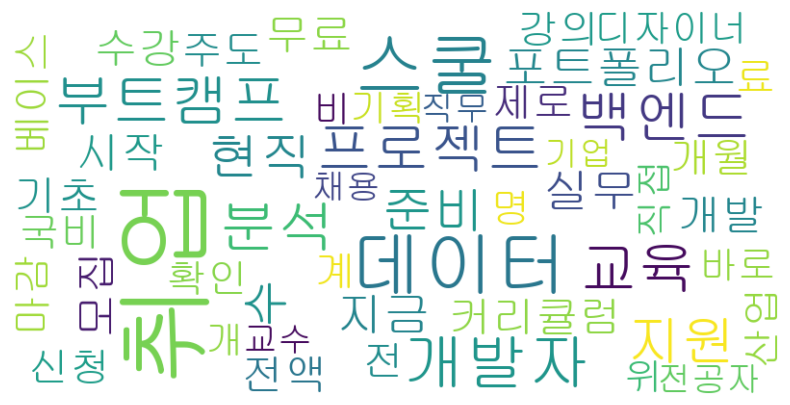

In [41]:
from wordcloud import WordCloud
font_path='C:/Windows/Fonts/NGULIM.ttf'

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    font_path=font_path,  # 한글 폰트 경로 설정
).generate_from_frequencies(dict(noun_list2))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()